In [244]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [245]:
data=pd.read_csv('/home/mohamed/Downloads/Compressed/obasety level/ObesityDataSet_raw_and_data_sinthetic.csv')

In [246]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [247]:
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [248]:
data = data.rename(columns={
    "family_history_with_overweight": "Fam_Overweight",
    "FAVC": "HighCal_Food",
    "FCVC": "Veggies",
    "NCP": "Main_Meals",
    "CAEC": "Snacking",
    "SMOKE": "Smoke",
    "CH2O": "Water_L",
    "SCC": "Cal_Monitor",
    "FAF": "Phys_Activity",
    "TUE": "Tech_Use_Hours",
    "CALC": "Alcohol",
    "MTRANS": "Transport",
    "NObeyesdad": "Obesity_Level"
})


In [249]:
data.head()

,Gender,Age,Height,Weight,Fam_Overweight,HighCal_Food,Veggies,Main_Meals,Snacking,Smoke,Water_L,Cal_Monitor,Phys_Activity,Tech_Use_Hours,Alcohol,Transport,Obesity_Level
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [250]:
data.shape

(2111, 17)

In [251]:
data.isnull().sum()

Gender            0
Age               0
Height            0
Weight            0
Fam_Overweight    0
HighCal_Food      0
Veggies           0
Main_Meals        0
Snacking          0
Smoke             0
Water_L           0
Cal_Monitor       0
Phys_Activity     0
Tech_Use_Hours    0
Alcohol           0
Transport         0
Obesity_Level     0
dtype: int64

In [252]:
data.duplicated().sum()

np.int64(24)

In [253]:
data=data.drop_duplicates()

In [254]:
data.head()

,Gender,Age,Height,Weight,Fam_Overweight,HighCal_Food,Veggies,Main_Meals,Snacking,Smoke,Water_L,Cal_Monitor,Phys_Activity,Tech_Use_Hours,Alcohol,Transport,Obesity_Level
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [255]:
data.describe()

,Age,Height,Weight,Veggies,Main_Meals,Water_L,Phys_Activity,Tech_Use_Hours
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [256]:
data['Obesity_Level_nu']=data['Obesity_Level'].replace({'Insufficient_Weight':'0','Normal_Weight':'1','Overweight_Level_I':'2','Overweight_Level_II':'3','Obesity_Type_I':'4','Obesity_Type_II':'5','Obesity_Type_III':'6'})

In [257]:
data['Obesity_Level_nu']=data['Obesity_Level_nu'].astype(int)

In [258]:
data_num=data.select_dtypes('number')
data_object=data.select_dtypes('object')

In [259]:
data_object.shape

(2087, 9)

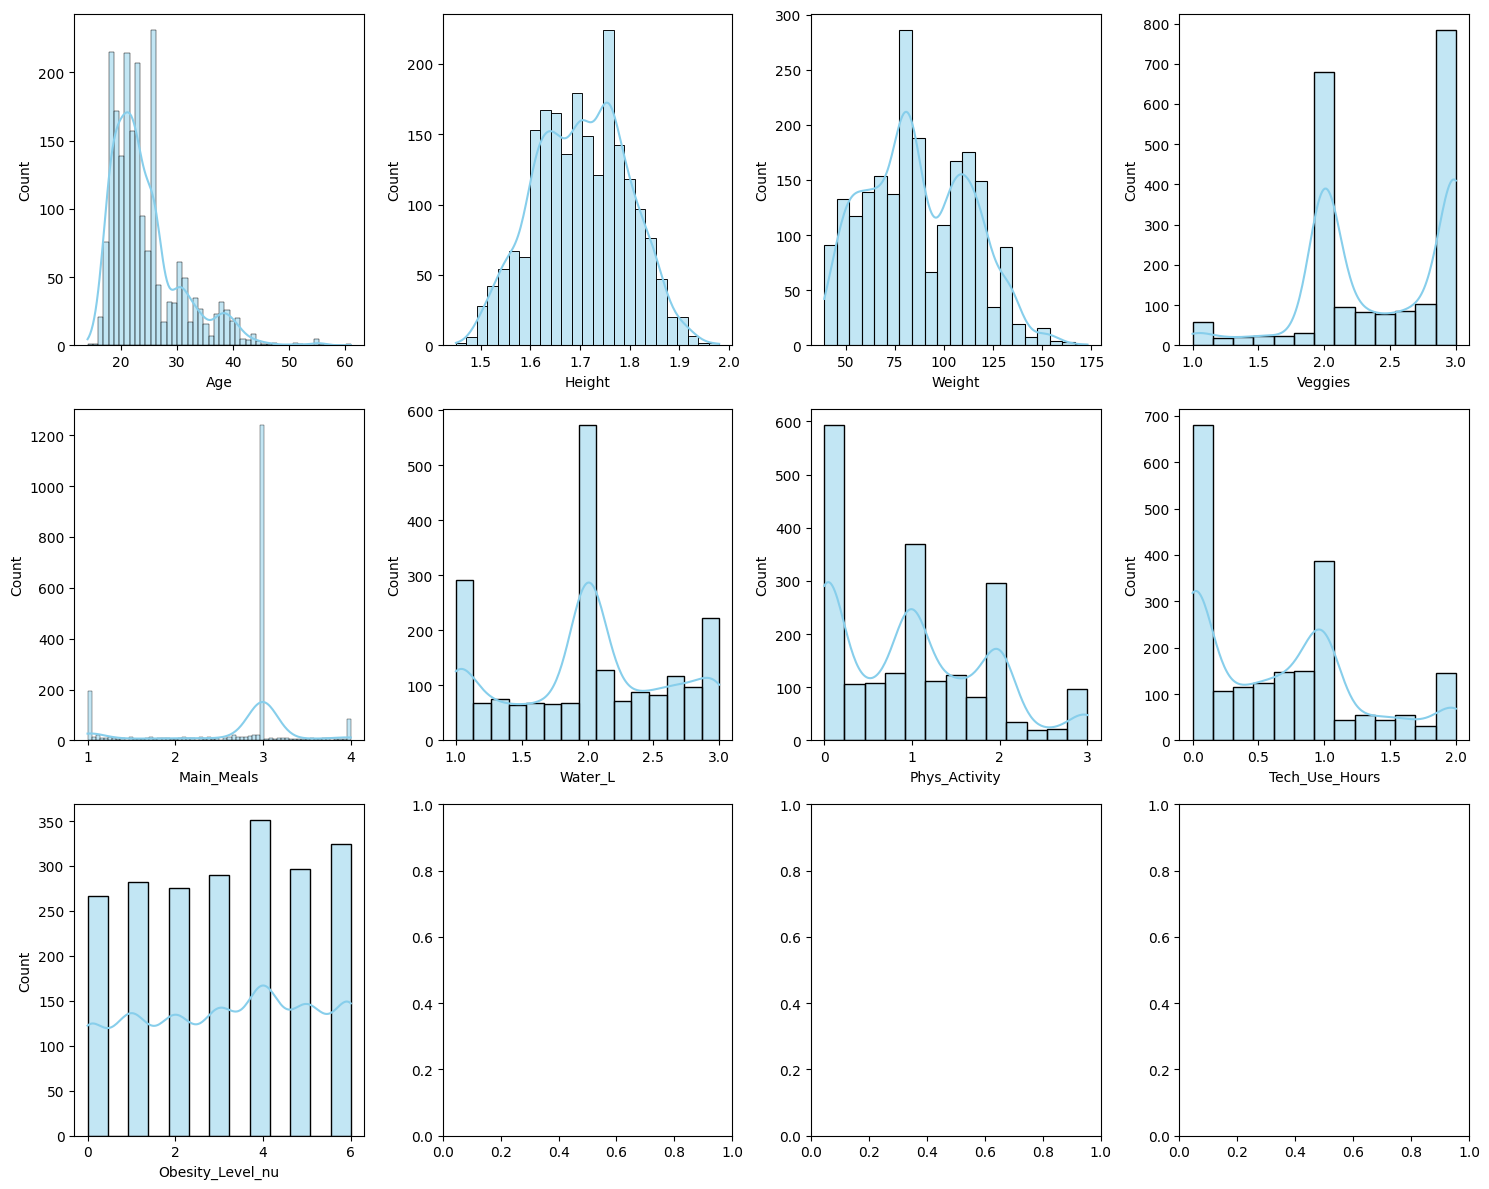

In [260]:
fig , axes=plt.subplots(ncols=4,nrows=3,figsize=(15,12))
axes=axes.flatten()
for i ,call in enumerate(data_num.columns):
    sns.histplot(x=data_num[call],ax=axes[i],kde=True,color='skyblue')
plt.tight_layout()    
plt.show()   

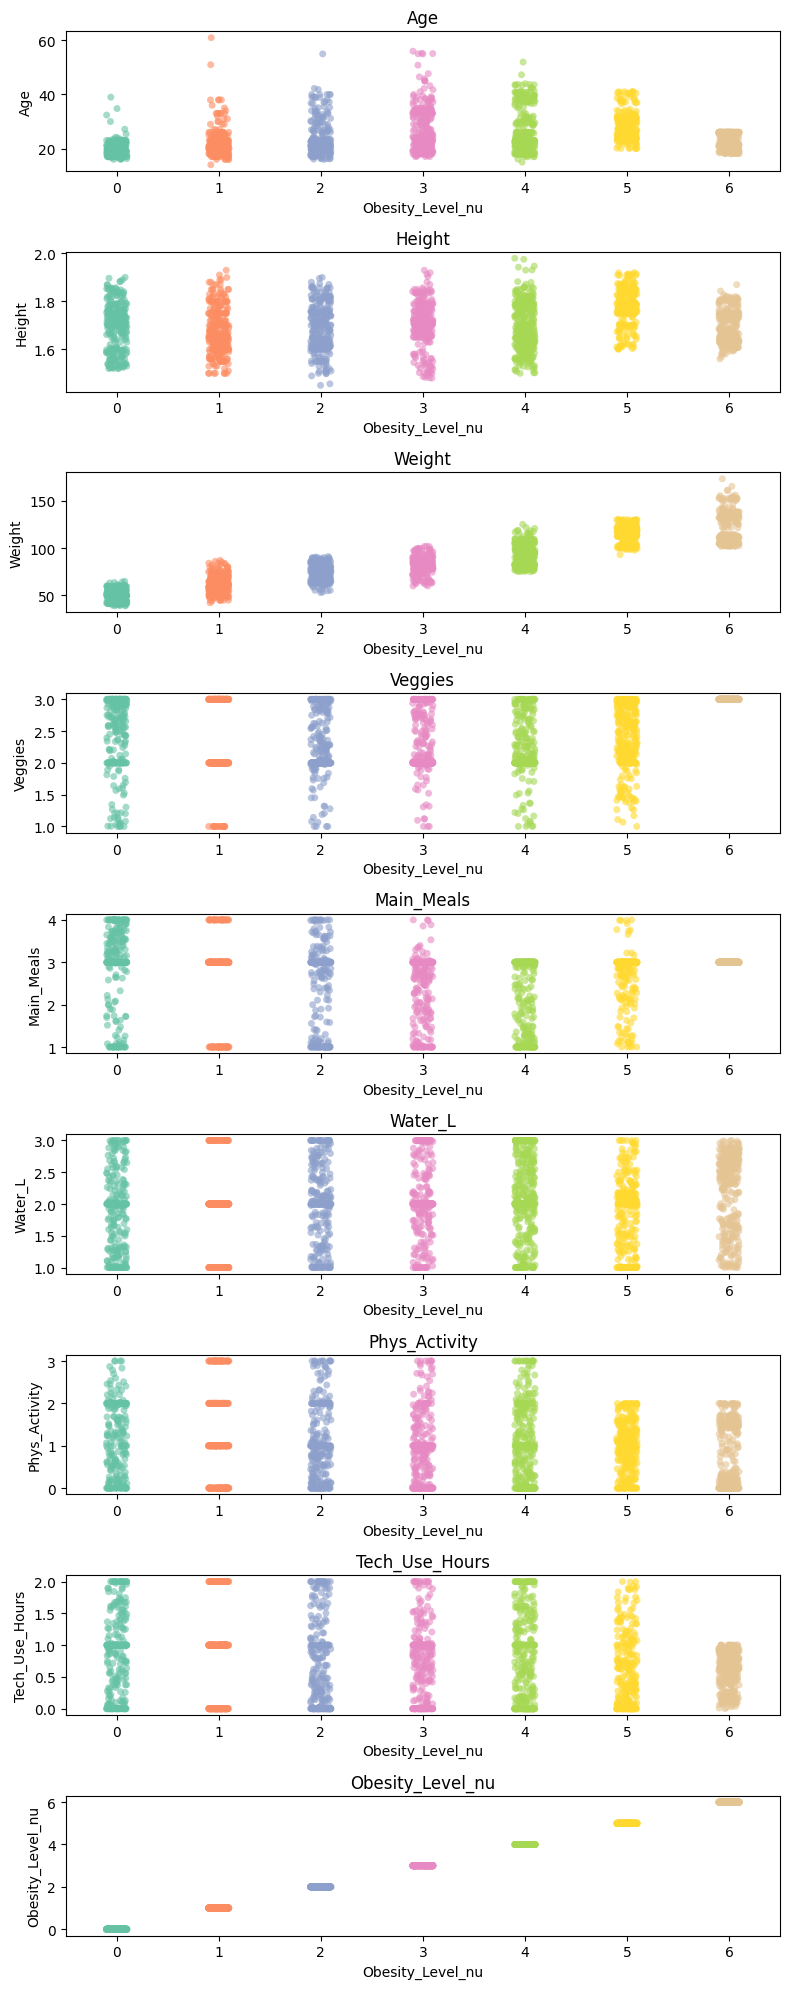

In [282]:
fig, axes = plt.subplots(nrows=9, ncols=1, figsize=(8, 20))
axes = axes.flatten()

for i, col in enumerate(data_num.columns):
    sns.stripplot(
        x='Obesity_Level_nu',
        y=col,
        data=data,
        ax=axes[i],
        hue='Obesity_Level_nu',
        palette='Set2',
        alpha=0.6,
        legend=False
    )
    axes[i].set_title(col)

plt.tight_layout()
plt.show()



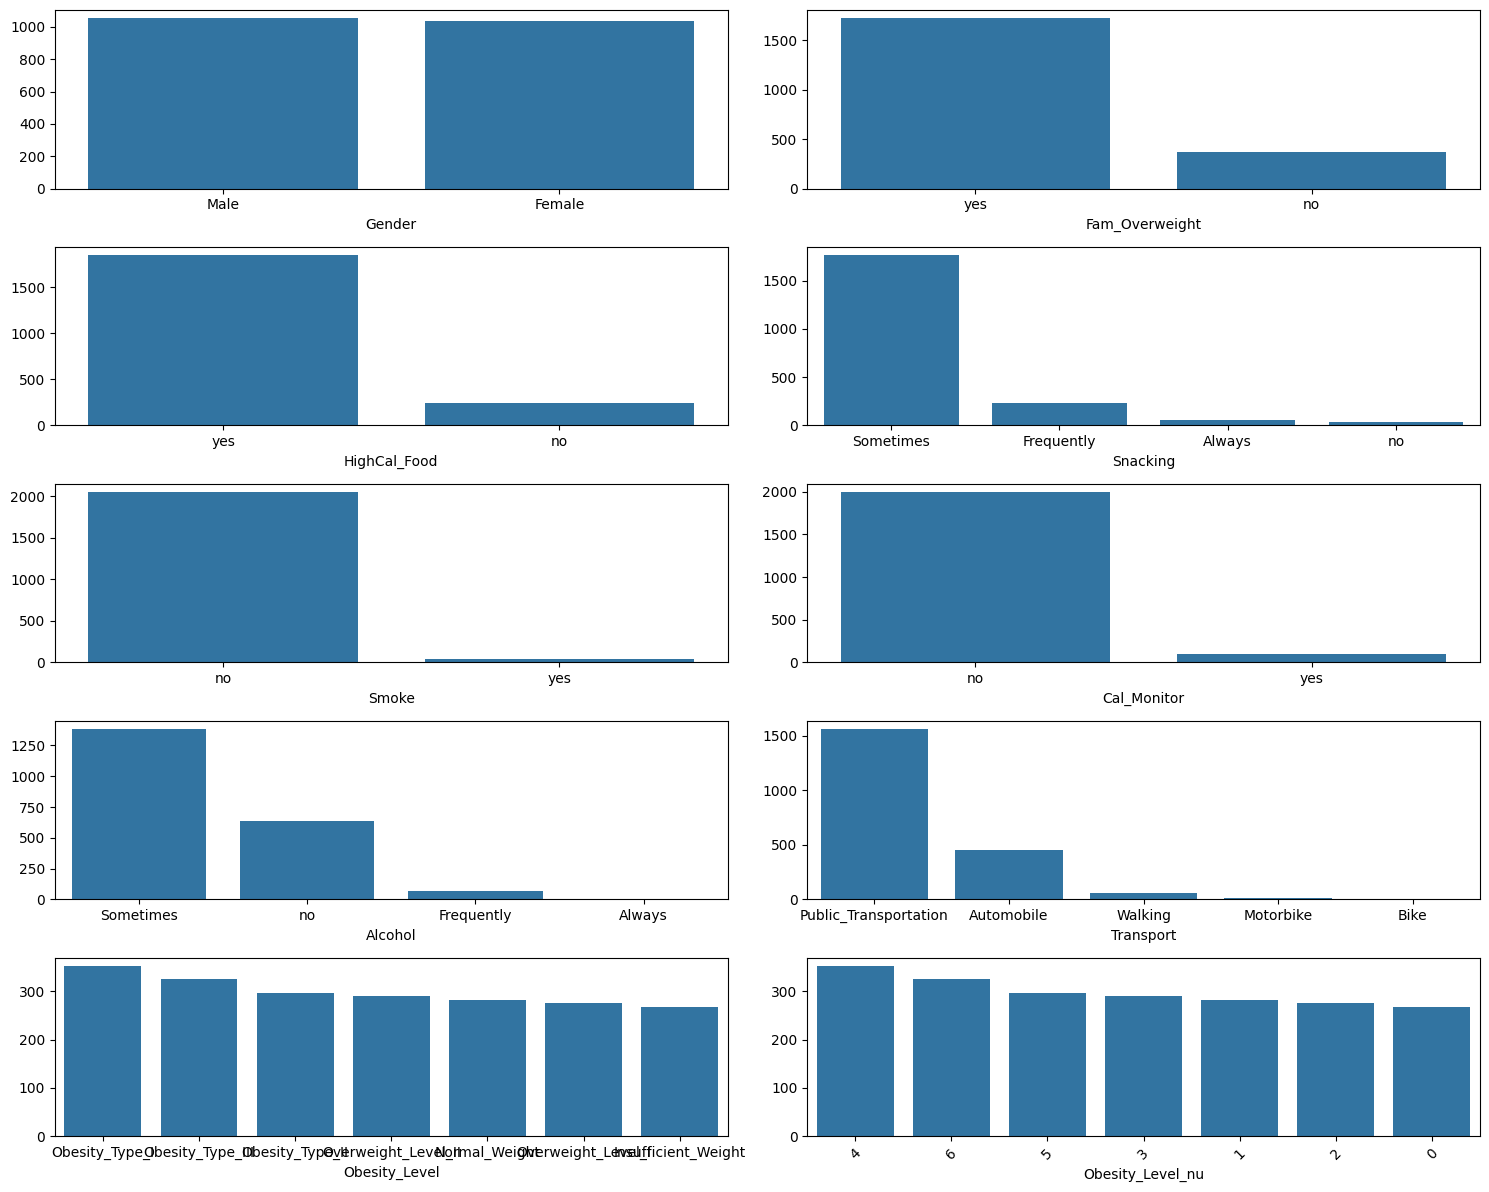

In [ ]:
fig , axes=plt.subplots(ncols=2,nrows=5,figsize=(15,12))
axes=axes.flatten()
for i ,call in enumerate(data_object.columns):
    data_obj_v_c=data_object[call].value_counts()
    sns.barplot(x=data_obj_v_c.index,y=data_obj_v_c.values,ax=axes[i])
plt.tight_layout()    
plt.xticks(rotation=45)
plt.show()   

In [ ]:
data.head()

,Gender,Age,Height,Weight,Fam_Overweight,HighCal_Food,Veggies,Main_Meals,Snacking,Smoke,Water_L,Cal_Monitor,Phys_Activity,Tech_Use_Hours,Alcohol,Transport,Obesity_Level,Obesity_Level_nu
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,1
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,1
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,2
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,3


In [262]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2087 entries, 0 to 2110
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               2087 non-null   float64
 1   Height            2087 non-null   float64
 2   Weight            2087 non-null   float64
 3   Veggies           2087 non-null   float64
 4   Main_Meals        2087 non-null   float64
 5   Water_L           2087 non-null   float64
 6   Phys_Activity     2087 non-null   float64
 7   Tech_Use_Hours    2087 non-null   float64
 8   Obesity_Level_nu  2087 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 163.0 KB


<Axes: >

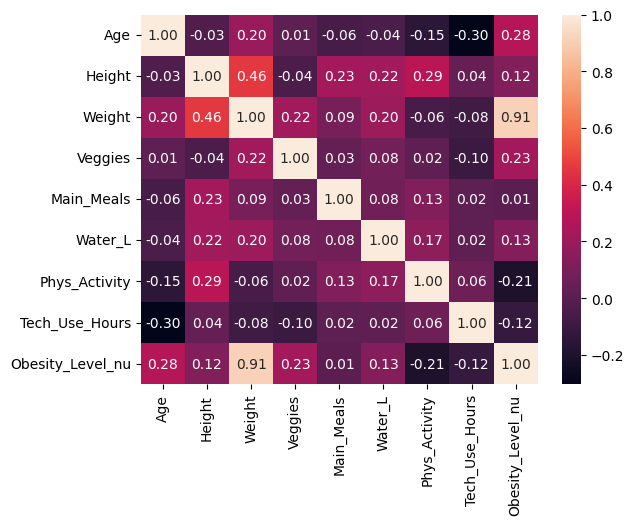

In [263]:
corr_rel=data_num.corr()
sns.heatmap(corr_rel,annot=True,fmt='.2f')

<Axes: xlabel='Gender', ylabel='count'>

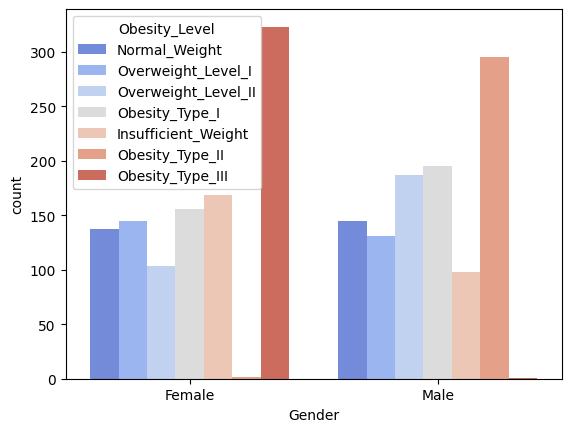

In [ ]:
sns.countplot(data=data,x='Gender',hue='Obesity_Level',palette='coolwarm')

<Figure size 1200x1000 with 0 Axes>

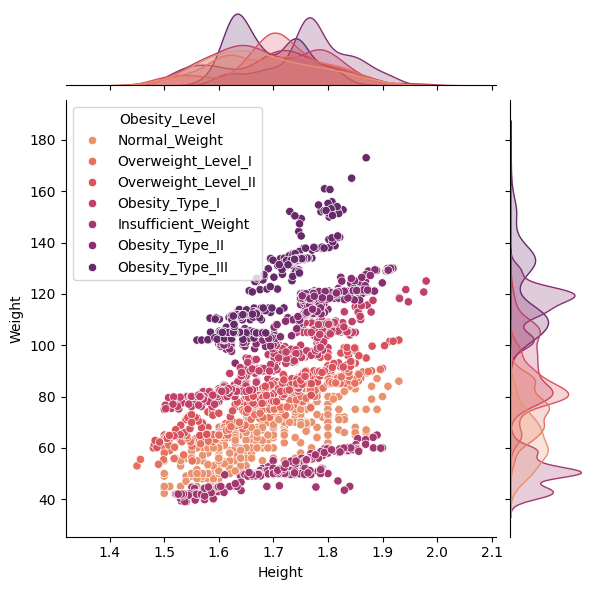

In [ ]:
plt.figure(figsize=(12,10))
sns.jointplot(data=data,x='Height',y='Weight',hue='Obesity_Level',palette='flare')
plt.show()

In [ ]:
data.head()

,Gender,Age,Height,Weight,Fam_Overweight,HighCal_Food,Veggies,Main_Meals,Snacking,Smoke,Water_L,Cal_Monitor,Phys_Activity,Tech_Use_Hours,Alcohol,Transport,Obesity_Level,Obesity_Level_nu
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,1
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,1
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,1
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,2
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,3


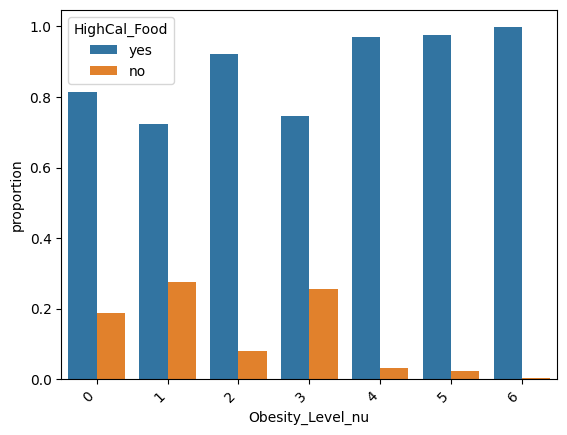

In [ ]:
obs_higcalo=data.groupby('Obesity_Level_nu')['HighCal_Food'].value_counts(normalize=True).reset_index()
sns.barplot(data=obs_higcalo,x='Obesity_Level_nu',y='proportion',hue='HighCal_Food')
plt.xticks(rotation=45,ha='right')

plt.show()

